# Linear Regression Example for SimpleAutodiff

## Content 
1. Generate a dataset 
2. Define our model + loss
3. Train our model
4. Visualize the result


In [1]:
%matplotlib inline

We use This so that we can access the file from above file

In [2]:
import sys
sys.path.append("..")

We are going to import all the classes we want to use.

In [3]:
from AutoDiff.scalarCalculation.values import variable, constant
from AutoDiff.scalarCalculation.operators import Arithmetic, sigmoid, square

Import random to add the noise to the generated data. 

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt

### Generate a dataset

Define the x numpy array

In [5]:
x = np.arange(-5.0, 5.0, 0.1)

Create a linear function, given a number x, return a $3x + 4$

In [6]:
def linearFunction(x):
    return x*3 + 4

Loop through the number between negative ten to ten with 0.1 interval and store it in the list.

In [7]:
y = linearFunction(x) + np.random.randn(100) * 0.5

Draw a data points

[0, 6, 0, 20]

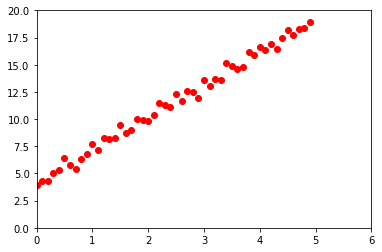

In [8]:
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])

### Define the model + loss

#### The model

Define a slope and y-intersection

In [9]:
w = variable.Variables(random.random())
b = variable.Variables(random.random())
print(w.value)
print(b.value)

0.3850806707616916
0.9379274057431857


Define the first point's x-axis and y-axis

In [10]:
x_var = constant.Constant(x[0].item())
y_var = constant.Constant(y[0].item())
num_point_inverse = constant.Constant(1/100)

#### The model loss

In [11]:
prediction = Arithmetic.Add(Arithmetic.Multiply(x_var, w), b)
loss = square.Square(Arithmetic.Minus(y_var , prediction))
print("x_var is", x_var.value)
print("y_var is", y_var.value)
print("The loss is", loss.forward())
print("The prediction is", prediction.forward())

x_var is -5.0
y_var is -10.99223126768927
The loss is 100.09512900554468
The prediction is -0.9874759480652724


#### Define a training loop 

In [12]:
loss.backward(1)
print("w grad is", w.get_grad())
print("b grad is ", b.get_grad())

w grad is -100.04755319623997
b grad is  20.009510639247996


#### Define the list that contains the loss
so that we can see how the loss decreases

In [13]:
loss_array = []

The loop

In [14]:
for a in range(15):
    for i in range(0, 100):
        # We sample the point
        random_num = np.random.randint(0, 100)
        x_var = constant.Constant(x[random_num].item())
        y_var = constant.Constant(y[random_num].item())
        
        # Do the prediction
        prediction = Arithmetic.Add(Arithmetic.Multiply(x_var, w), b)
        
        # Calculate the loss
        loss = square.Square(Arithmetic.Minus(y_var , prediction))
        print("The Loss is", loss.forward())
        
        # Every 10 iterations 
        if i % 10 == 0:
            loss_array.append(loss.forward())
        loss.backward(1)
        
        # Update the loss
        w.value = w.value - 0.001 * w.get_grad()
        b.value = b.value - 0.001 * b.get_grad()

The Loss is 63.77374873024531
The Loss is 48.69095382718962
The Loss is 182.5913692200469
The Loss is 4.146078232887314
The Loss is 20.15292499419646
The Loss is 198.11211856396088
The Loss is 13.781464769598257
The Loss is 54.63535353417504
The Loss is 37.425406115774344
The Loss is 71.53954854285037
The Loss is 0.922047770437599
The Loss is 0.01468779768280916
The Loss is 42.79114410088291
The Loss is 24.494084441598012
The Loss is 11.539317816026957
The Loss is 0.14879425706634355
The Loss is 113.58504342400398
The Loss is 120.82077285813328
The Loss is 19.232644043637908
The Loss is 3.055845728580294
The Loss is 44.194799551686486
The Loss is 23.69515481757568
The Loss is 2.082375074108109
The Loss is 13.114199969327462
The Loss is 1.3312679936576783
The Loss is 0.10445306984997928
The Loss is 129.2920846923343
The Loss is 9.921034123347372
The Loss is 32.86734566059054
The Loss is 2.424523039036941
The Loss is 130.4713030510575
The Loss is 0.17557838287125668
The Loss is 2.6008257

The Loss is 2.13113330328931
The Loss is 2.6016056210930962
The Loss is 5.592013002762485
The Loss is 2.79391654149254
The Loss is 0.5042700719041212
The Loss is 1.258276720615318
The Loss is 2.5133849039651865
The Loss is 1.8195701605440693
The Loss is 2.6149363650969546
The Loss is 2.939440190164269
The Loss is 3.5496020716662233
The Loss is 2.949213184363401
The Loss is 1.2289686331608756
The Loss is 1.4817823760439273
The Loss is 1.4355080167291836
The Loss is 4.849145545631705
The Loss is 2.0053476891069657
The Loss is 3.7902997025055534
The Loss is 4.478579425559151
The Loss is 3.8363770547207636
The Loss is 2.0323162153657086
The Loss is 1.3711375794642249
The Loss is 4.306560417803039
The Loss is 5.165875540967534
The Loss is 0.6216694618515339
The Loss is 8.952637576994771
The Loss is 4.63855265367475
The Loss is 1.609962786860707
The Loss is 2.4889042193343234
The Loss is 2.0343403030676264
The Loss is 0.4437782869235553
The Loss is 0.207053475365636
The Loss is 5.62118892006

The Loss is 0.1554811787419565
The Loss is 3.2762586182015876
The Loss is 1.2661057482790585
The Loss is 1.249699046261812
The Loss is 0.9920283096341845
The Loss is 0.8188718390174292
The Loss is 0.18210557053408302
The Loss is 1.1931438564190155
The Loss is 1.7928864586512734
The Loss is 0.5879889536714538
The Loss is 0.4149364855527682
The Loss is 1.646238164720882
The Loss is 0.31985230252499147
The Loss is 0.009011959424382642
The Loss is 0.42860046635881
The Loss is 0.4800597981197508
The Loss is 0.2144163712489141
The Loss is 0.4957674377127067
The Loss is 0.05925107129615768
The Loss is 0.21458971406749844
The Loss is 0.0012297772029639424
The Loss is 0.9498535477507398
The Loss is 0.014552593451128701
The Loss is 0.12989188305987714
The Loss is 0.04193247568237376
The Loss is 1.063304378336
The Loss is 1.4324976612863114
The Loss is 0.06692691532993122
The Loss is 0.58919856284227
The Loss is 0.9172015923269297
The Loss is 0.46140344413649487
The Loss is 0.19709215605981345
Th

The Loss is 0.3019378145778406
The Loss is 0.5079977633125555
The Loss is 0.5131068457445329
The Loss is 0.17424780181661498
The Loss is 0.0674999078989104
The Loss is 0.10757296179472972
The Loss is 0.02857295799188356
The Loss is 1.4746856922876874
The Loss is 0.011109420187533707
The Loss is 0.02859984062754076
The Loss is 0.26053427090996145
The Loss is 0.10866908725510377
The Loss is 1.2539139823032628
The Loss is 0.17192514461649094
The Loss is 0.28829832389601756
The Loss is 0.28855835311964984
The Loss is 0.2795525761735136
The Loss is 0.1762284067364301
The Loss is 0.0005309038876283822
The Loss is 0.3435352918085627
The Loss is 0.4449078858568115
The Loss is 0.032429508522532735
The Loss is 0.5838921473648552
The Loss is 0.14923512868631586
The Loss is 1.015121111360144
The Loss is 0.2429847052288502
The Loss is 6.845628379152022e-08
The Loss is 0.02232563431506939
The Loss is 0.07643457613117939
The Loss is 2.780749118702769e-06
The Loss is 0.014027002185277826
The Loss is 1

## Visualize the result

#### Plot the loss.

Text(0,0.5,'Loss')

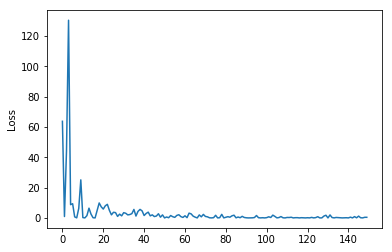

In [15]:
plt.plot(loss_array)
plt.ylabel('Loss')

#### Plot the result

As you can see the w value and b value is similar to the defined model

In [16]:
print("w value is", w.value)
print("b value is", b.value)

w value is 3.017211905675613
b value is 3.8672738684198533


Let's see how the w value and b value graph turn out!!!

[0, 6, 0, 20]

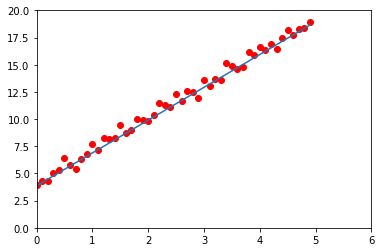

In [17]:
plt.plot(x, y, 'ro')
plt.plot(x, x*w.value + b.value)
plt.axis([0, 6, 0, 20])

We made it using simpleAutoDiff